## 1. Winter is Coming. At least for those who have yet to watch the series!
<p>I know most of you had a blast with <em>Game of Thrones</em>, no one can blame you actually. The "awkward moment" lies in the fact I haven't watched it, still I am taking a step forward into doing an analysis on it. Such is the power of data science! In this notebook, we will analyze the co-occurrence network of the characters in the  Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. </p>
<p><img src="https://assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>
<p>The dataset provided is a network that occurs from the interaction between the characters of the series, with <em>edges</em> between characters representing the interaction itself. Ok let's do this! First we will import the dataset of <em>A Game of Thrones</em> and do some exploratory analysis</p>

In [1]:
# Importing modules
import pandas as pd

# Reading in datasets/book1.csv
book1 = pd.read_csv('./datasets/book1.csv')

# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


## 2. Time for some Network of Thrones
<p>The resulting DataFrame <code>book1</code> has 5 columns(attributes): <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an edge. The graph here is an undericted one. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>
<p>Now it time to procced into making a network out of the dataframe we've just created. We will use <code>networkx</code> and create a graph object for the first book.</p>

In [2]:
# Importing modules
import networkx as nx

# Creating an empty graph object
G_book1 = nx.Graph()

## 3. Populate the network with the DataFrame
<p>Currently, the graph object <code>G_book1</code> is empty. Let's now populate it with the edges from <code>book1</code>. And while we're at it, let's load in the rest of the books too!</p>

In [3]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])


# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['./datasets/book2.csv', './datasets/book3.csv', './datasets/book4.csv', './datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## 4. Drawing the graph
<p>Now let's have a draft drawing of the graph, been made from the first book of the series. As you'll notice the drawing is a rather "messy" one, we can't make any conclusions from it, still worth the effort of having a first, intuitive glimpse of the information entropy in it.</p>

In [4]:
# Make a simple drawing of graph
nx.draw(G_book1)

## 5. The most important character in Game of Thrones
<p>Wow! look at all these red circles! It seems like there is a lot of densed information in there. Let's now try to interpret this, unlock the secrets of the Iron Throne. Who is the most important character?</p>

<p>Is it Jon Snow, Tyrion, Daenerys, or someone else? There are many different metrics to measure the importance of a node in a network. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.</p>

<p>First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter is an account which has a high number of followers. This measure of importance is called <em>degree centrality</em>.</p>
<p>Using this measure, let's extract the top ten important characters from the first book (<code>book[0]</code>) and the fifth book (<code>book[4]</code>).</p>

In [5]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key= lambda x: x[1], reverse=True)

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key= lambda x: x[1], reverse=True)

# Printing out the top 10 of book1 and book5
print('Top10 for book1:\n', sorted_deg_cen_book1[:10])
print('\nTop10 for book5:\n', sorted_deg_cen_book5[:10])

Top10 for book1:
 [('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]

Top10 for book5:
 [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## 6. The evolution of character importance
<p><em>Degree centrality</em> tells us that the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book, where John Snow takes the lead. The importance of characters changes over the course of five books. People die, the dead walk the earth, dragons destroy everything and lots of other stuff occur (I should have said: "spoiler alert". Oops.)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

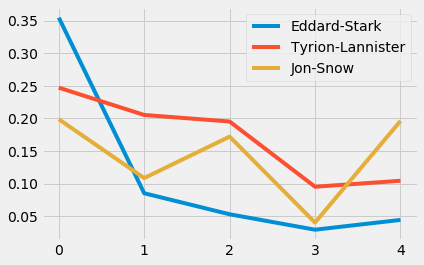

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
plt.style.use('fivethirtyeight')
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()
plt.show()

## 7. Examing the top 4 characters. Something's fishy about Stannis-Barratheon?
<p>The importance of Eddard Stark seems to die off as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book ( **S P O I L E R S. DO NOT READ:** Could that be due to his death, therefore less mentions of his name, and his subsequent ressurection which ultimately "brought" his name back to the story pages?)</p>
<p>Now let's look at various other measures like <em>betweenness centrality</em> and <em>PageRank</em> to find important characters and see if we can uncover some more interesting facts about this network. Let's plot the evolution of betweenness centrality of this network over the five books. We will take the evolution of the top four characters of every book and plot it.</p>

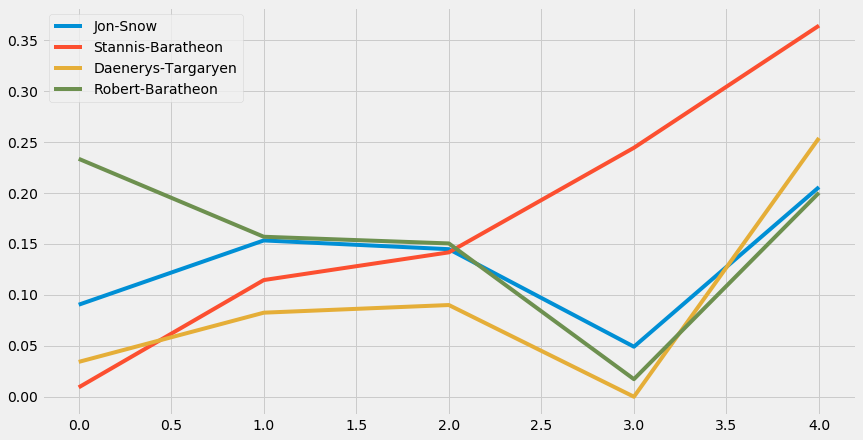

In [7]:

# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char = set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))
plt.show()

## 8. Google PageRank and GoT: (re)defining the term "important character"
<p>The <em>betwenees centrality</em>, calculated above, simply put is: finding the nodes which hold the network together, that is, if you remove such a node you are breaking apart the network</p>
<p>We see a peculiar rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>Let's use now the <em>page rank</em> metric to unlock a different prespective. PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

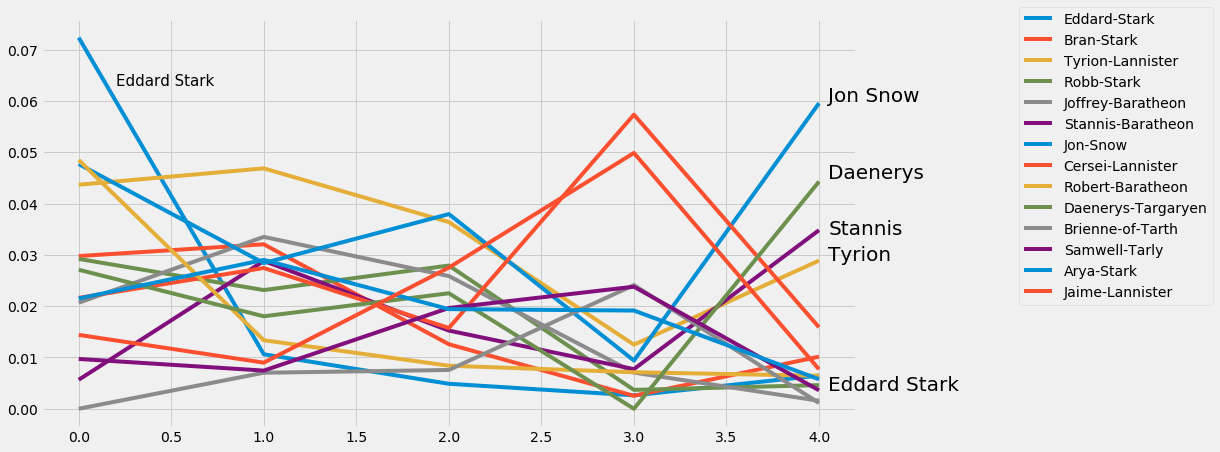

In [8]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame(evol).fillna(0)
# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

# Setting text font parameters to facilitate finding the 4 top characters
plt.text(4.05, 0.06, 'Jon Snow', size=20)
plt.text(4.05, 0.045, 'Daenerys', size=20)
plt.text(4.05, 0.034, 'Stannis', size=20)
plt.text(4.05, 0.029, 'Tyrion', size=20)
plt.text(4.05, 0.0035, 'Eddard Stark', size=20)
plt.text(0.2, 0.063, 'Eddard Stark', size=15)
plt.legend(loc=(1.2,0.3))
plt.show()

## 9. Correlation between different measures
<p>The above graph is quite messy because it lists ALL the characters, so I provide legends to the far right so we can easily spot the 4 most important characters (plus Eddard Stark who made a "skydive", worth of mentioning).</p>
<p>As it seems Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book (far right, in the plot) according to PageRank. We can also witness the "fall" of Eddard Stark: He is important in the first book but falls into oblivion over the book series.</p>
<p>We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three measures so maybe there is a strong correlation between them?</p>
<p>Let's look at the correlation between PageRank, betweenness centrality and degree centrality for the fifth book using Pearson correlation.</p>

In [9]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame(measures, index=['pageRank', 'betweeness', 'degree'])

# Calculating the correlation
cor.T.corr()

,pageRank,betweeness,degree
pageRank,1.000000,0.793372,0.971493
betweeness,0.793372,1.000000,0.833816
degree,0.971493,0.833816,1.000000


## 10. Conclusion
<p>We see a high correlation between these three measures for our characters. Intuitively that means we should evaluate them in a "hand by hand" approach. We should note though, that correlation does not mean causation!</p>
<p>According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures? From the results it seems like Jon might have an upper hand. Fans will probably pleased</p>

In [10]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Format the results and print them
results = """Important character(s) according to:
\t- page rank is: {0}
\t- betweeness centrality is: {1} 
\t- degree centrality is: {2}"""

print(results.format(p_rank, b_cent, d_cent))

Important character(s) according to:
	- page rank is: Jon-Snow
	- betweeness centrality is: Stannis-Baratheon 
	- degree centrality is: Jon-Snow
